In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

---

## The Data

DATA SOURCE: https://www.kaggle.com/rikdifos/credit-card-approval-prediction

Feature Information:

<table>
<thead>
<tr>
<th>application_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>CODE_GENDER</code></td>
<td>Gender</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_CAR</code></td>
<td>Is there a car</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_REALTY</code></td>
<td>Is there a property</td>
<td></td>
</tr>
<tr>
<td><code>CNT_CHILDREN</code></td>
<td>Number of children</td>
<td></td>
</tr>
<tr>
<td><code>AMT_INCOME_TOTAL</code></td>
<td>Annual income</td>
<td></td>
</tr>
<tr>
<td><code>NAME_INCOME_TYPE</code></td>
<td>Income category</td>
<td></td>
</tr>
<tr>
<td><code>NAME_EDUCATION_TYPE</code></td>
<td>Education level</td>
<td></td>
</tr>
<tr>
<td><code>NAME_FAMILY_STATUS</code></td>
<td>Marital status</td>
<td></td>
</tr>
<tr>
<td><code>NAME_HOUSING_TYPE</code></td>
<td>Way of living</td>
<td></td>
</tr>
<tr>
<td><code>DAYS_BIRTH</code></td>
<td>Birthday</td>
<td>Count backwards from current day (0), -1 means yesterday</td>
</tr>
<tr>
<td><code>DAYS_EMPLOYED</code></td>
<td>Start date  of employment</td>
<td>Count backwards from current day(0). If  positive, it means the person currently unemployed.</td>
</tr>
<tr>
<td><code>FLAG_MOBIL</code></td>
<td>Is there a mobile   phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_WORK_PHONE</code></td>
<td>Is there a work phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_PHONE</code></td>
<td>Is there a phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_EMAIL</code></td>
<td>Is there an email</td>
<td></td>
</tr>
<tr>
<td><code>OCCUPATION_TYPE</code></td>
<td>Occupation</td>
<td></td>
</tr>
<tr>
<td><code>CNT_FAM_MEMBERS</code></td>
<td>Family size</td>
<td></td>
</tr>
</tbody>
</table>

So essentially you can think of today as zero and then DAYS_BIRTH represents a negative number.
So how many days before today were they born. That's why this is negative.

In [2]:
df = pd.read_csv('application_record.csv')

In [3]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

----
----
#### TASK: Recreate the Scatter Plot shown below

The scatterplot attempts to show the relationship between the days employed versus the age of the person (DAYS_BIRTH) for people who were not unemployed. Also note the sign of the axis, they are both transformed to be positive.

<img src="task_one.jpg">


It makes sense that this is a more or less linear relationship because the longer you've been alive, more likely the longer you've been employed.
<br>You can see there's kind of this cutoff because you can't really work more days than you've been alive. So that's why you have this linear cutoff.

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

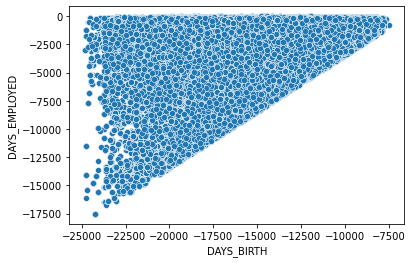

In [6]:
sns.scatterplot(data=df[df['DAYS_EMPLOYED'] < 0], x='DAYS_BIRTH', y='DAYS_EMPLOYED')

In [7]:
employed = df[df['DAYS_EMPLOYED'] < 0]

In [8]:
print(df.shape)
print(employed.shape)

(438557, 18)
(363228, 18)


In [9]:
employed['DAYS_EMPLOYED'] = employed['DAYS_EMPLOYED'] * (-1)
employed['DAYS_BIRTH'] = employed['DAYS_BIRTH'] * (-1)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

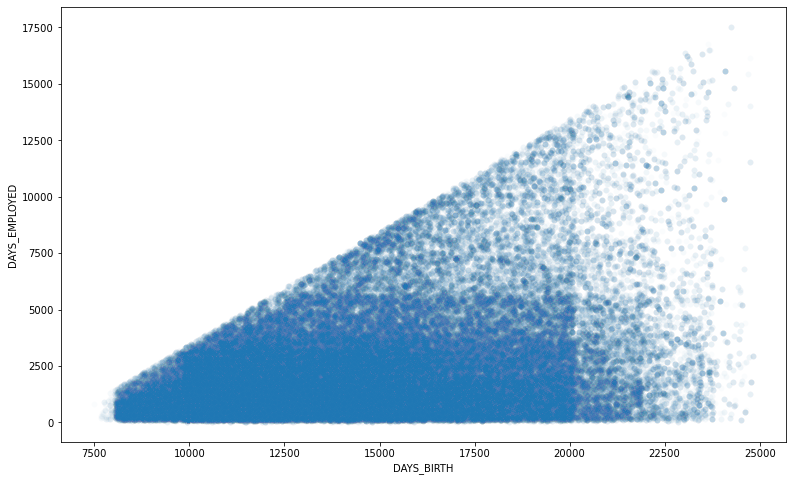

In [15]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=employed, y='DAYS_EMPLOYED', x='DAYS_BIRTH', alpha=.02)

-----
-----
#### TASK: Recreate the Distribution Plot shown below:

<img src="DistPlot_solution.png">

**Note, you will need to figure out how to calculate "Age in Years" from one of the columns in the DF.**

___

In [26]:
from datetime import datetime, timedelta

In [27]:
datetime.now().date()

datetime.date(2022, 5, 24)

In [28]:
def getBirthDate(daysBefore):
    return datetime.now().date() + timedelta(days=daysBefore)

In [29]:
df['birthDate'] = df['DAYS_BIRTH'].apply(getBirthDate)

In [30]:
df['birthDate']

0         1989-07-11
1         1989-07-11
2         1963-08-08
3         1970-01-27
4         1970-01-27
             ...    
438552    1960-03-13
438553    1978-10-03
438554    2000-01-11
438555    1963-01-21
438556    1970-10-06
Name: birthDate, Length: 438557, dtype: object

---

In [35]:
df['Age in Years'] = np.abs(df['DAYS_BIRTH'])/365

In [36]:
df['Age in Years']

0         32.890411
1         32.890411
2         58.832877
3         52.356164
4         52.356164
            ...    
438552    62.238356
438553    43.668493
438554    22.380822
438555    59.378082
438556    51.665753
Name: Age in Years, Length: 438557, dtype: float64

<AxesSubplot:xlabel='Age in Years', ylabel='Count'>

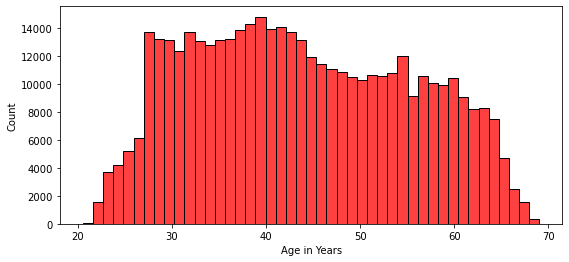

In [43]:
plt.figure(figsize=(9, 4))
sns.histplot(data=df, x='Age in Years', bins=45, color='red')

-----
-----
#### TASK: Recreate the Categorical Plot shown below:

<img src='catplot_solution.png'>

**This plot shows information only for the *bottom half* of income earners in the data set. You may want to explore the *order* parameter to get the xticks in the exact order shown here**

In [49]:
print(len(df))
print(len(df)/2)
print(round(len(df)/2))

438557
219278.5
219278


In [54]:
df.nsmallest(n=round(len(df)/2), columns='AMT_INCOME_TOTAL')  # the bottom half if you sorted by 'AMT_INCOME_TOTAL'

# or int(len(df)/2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age in Years,birthDate
273113,6093713,F,N,N,0,26100.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21003,365243,1,0,0,0,NaN,2.0,57.542466,1964-11-21
436891,6093712,F,N,N,0,26100.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21003,365243,1,0,0,0,NaN,2.0,57.542466,1964-11-21
43817,5126174,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,40.736986,1981-09-07
43818,5126175,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,40.736986,1981-09-07
43819,5995345,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,40.736986,1981-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322007,6273675,M,Y,Y,0,160780.5,Commercial associate,Secondary / secondary special,Married,House / apartment,-11473,-167,1,1,0,0,Managers,2.0,31.432877,1990-12-25
322008,6273677,M,Y,Y,0,160780.5,Commercial associate,Secondary / secondary special,Married,House / apartment,-11473,-167,1,1,0,0,Managers,2.0,31.432877,1990-12-25
322009,6273679,M,Y,Y,0,160780.5,Commercial associate,Secondary / secondary special,Married,House / apartment,-11473,-167,1,1,0,0,Managers,2.0,31.432877,1990-12-25
322010,6273680,M,Y,Y,0,160780.5,Commercial associate,Secondary / secondary special,Married,House / apartment,-11473,-167,1,1,0,0,Managers,2.0,31.432877,1990-12-25


In [55]:
bottom_half_income = df.nsmallest(n=int(len(df)/2), columns='AMT_INCOME_TOTAL')

In [56]:
bottom_half_income.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Age in Years',
       'birthDate'],
      dtype='object')

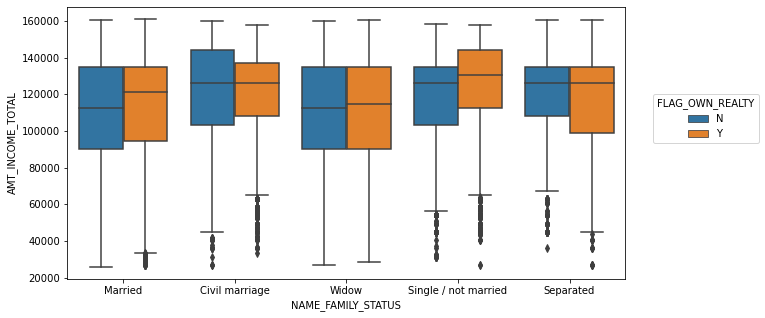

In [69]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=bottom_half_income, x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', hue='FLAG_OWN_REALTY', 
           order=['Married', 'Civil marriage', 'Widow', 'Single / not married', 'Separated'])

plt.legend(loc=(1.05, 0.5), title='FLAG_OWN_REALTY')

---
---

#### TASK: Recreate the Heat Map shown below:

<img src='heatmap_solution.png'>

**This heatmap shows the correlation between the columns in the dataframe. You can get correlation with .corr() , also note that the FLAG_MOBIL column has NaN correlation with every other column, so you should drop it before calling .corr().**

In [70]:
df.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Age in Years
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000,-0.306179


In [79]:
df.drop('FLAG_MOBIL', axis=1).corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Age in Years
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,0.049777,-0.024213,0.022054,1.000000,-0.306179
Age in Years,0.004994,-0.349088,-0.053775,-1.000000,0.617908,-0.171829,0.037984,-0.096752,-0.306179,1.000000


<AxesSubplot:>

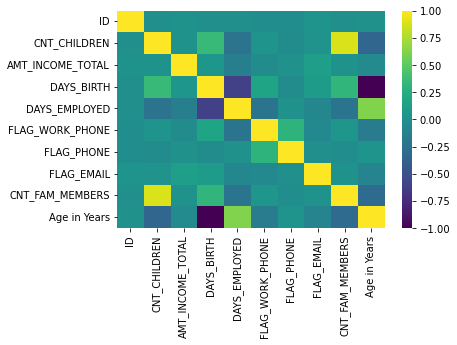

In [82]:
sns.heatmap(data=df.drop('FLAG_MOBIL', axis=1).corr(), cmap='viridis')

We're going to often actually do a heatmap() on the correlation of features within machine learning to see what features are good candidates for trying to predict a label. So create a correlation dataframe and then use the heatmap() so I can quickly point out visually what's important and what may not be so important.

<AxesSubplot:>

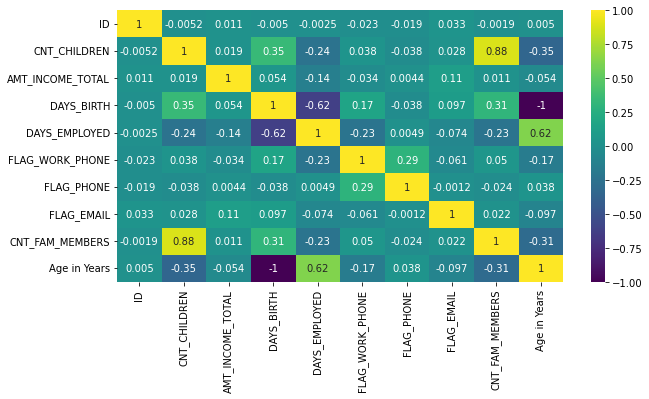

In [85]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=df.drop('FLAG_MOBIL', axis=1).corr(), cmap='viridis', annot=True)

---